# Logistic Regression

email: saideeptalari@gmail.com

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import make_classification

## Multi-Variate

In [3]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
X = X+50

In [4]:
df = DataFrame(X,columns=['Tumor Size','Tumor Density'])

In [5]:
df.head()

,Tumor Size,Tumor Density
0,50.898200,50.781849
1,49.852937,51.446585
2,50.885753,50.897546
3,49.935410,51.977787
4,49.262582,51.505976


In [6]:
df['Malignant'] = Y

In [7]:
df.head()

,Tumor Size,Tumor Density,Malignant
0,50.898200,50.781849,1
1,49.852937,51.446585,0
2,50.885753,50.897546,1
3,49.935410,51.977787,0
4,49.262582,51.505976,0


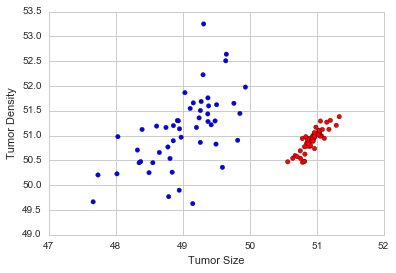

In [8]:
c_map = {0:'b',1:'r'}
df.plot(kind='scatter',x='Tumor Size',y='Tumor Density',c=[c_map[_] for _ in df['Malignant']],legend=True)

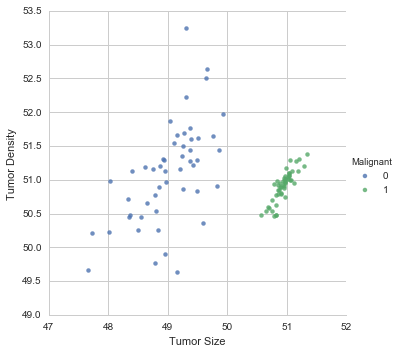

In [9]:
sns.lmplot('Tumor Size','Tumor Density',data=df,hue='Malignant',fit_reg=False)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The corresponding hypothesis is:

$$\theta_0+\theta_1(x_1)+\theta_2(x_2)\geq0$$

For plotting the desicion boundary we need to compute either $x_1$ or $x_2$

Therefore:
$$\implies x_2 = \frac{-\theta_0-\theta_1(x_1)}{\theta_2}$$

In [12]:
t0 = model.intercept_
t1,t2 = model.coef_[0]

In [13]:
eq = (-t0-t1*np.sort(X[:,0]))/t2

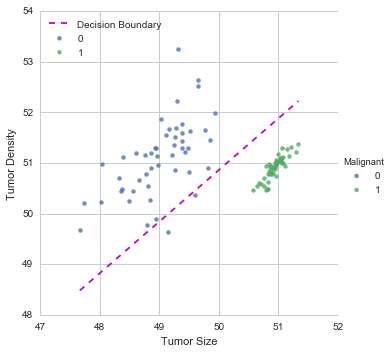

In [14]:
sns.lmplot('Tumor Size','Tumor Density',data=df,hue='Malignant',fit_reg=False)
plt.plot(np.sort(X[:,0]),eq,'m--',label='Decision Boundary')
plt.legend(loc='upper left')

### Gradient Descent

In [15]:
class GradientDescent(object):
    
    def __init__(self,alpha=0.1,n_iter=100,threshold=0.5):
        self.alpha = alpha
        self.n_iter = n_iter
        self.cost = []
        self.coefs = None
        self.threshold = threshold
        
    def fit(self,data,target):
        self.X = np.hstack((np.ones((data.shape[0],1)),data))
        self.Y = target
        m,n = self.X.shape
        self.n_features = n
        self.n_entries = m
        
    def run(self):
        theta = np.ones(self.n_features)
        xTrans = self.X.T
        for i in range(0, self.n_iter):
            hwx = 1/(1+np.e**(-np.dot(self.X, theta)))
            loss = hwx - self.Y
            m = self.n_entries
            cost = -(1/m)*(np.sum(self.Y*np.log(hwx)-((1-self.Y)*np.log(1-hwx))))
            self.cost.append(cost)
            gradient = np.dot(xTrans, loss) / m
            theta = theta - self.alpha * gradient
        self.coefs=theta
        return theta[0],theta[1:]
    
    def plot(self):
        plt.xlabel('No of Iterations')
        plt.ylabel('Cost function')
        return plt.plot(np.arange(1,self.n_iter+1),self.cost)
    
    def predict(self,data):
        data = np.hstack((np.ones((data.shape[0],1)),data))
        output = np.dot(data,self.coefs)
        output[output>=self.threshold] = 1
        output[output<self.threshold]= 0
        return output
    
    def score(self,data,target):
        predicted = self.predict(data)
        true = target
        return 1-(np.sum((true-predicted)**2)/np.sum((true-true.mean())**2))

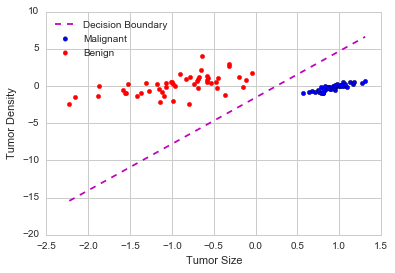

In [16]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X)

X = X_scaler.transform(X)

gd = GradientDescent(alpha=5.6,n_iter=3000)
gd.fit(X,Y)
coefs = gd.run()
t0 = coefs[0]
t1,t2 = coefs[1]
eq = (-t0-t1*np.sort(X[:,0]))/t2

plt.scatter(X[Y==1][:,0],X[Y==1][:,1],label='Malignant')
plt.scatter(X[Y==0][:,0],X[Y==0][:,1],color='red',label='Benign')


plt.plot(np.sort(X[:,0]),eq,'m--',label='Decision Boundary')
plt.legend(loc='upper left')
plt.xlabel("Tumor Size")
plt.ylabel("Tumor Density")

In [17]:
#r-squared score for complete set using Gradient Descent
gd.score(X,Y)

1.0

In [18]:
#r-squared score for complete set using Normal Equation
model.score(X,Y)

0.93999999999999995

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
model = LogisticRegression()
model.fit(X_train,Y_train)
#r-squared score for testing set using Normal Equation
model.score(X_test,Y_test)

1.0

In [21]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_test = X_scaler.transform(X_test)
X_train = X_scaler.transform(X_train)
gd = GradientDescent()
gd.fit(X_train,Y_train)
gd.run()
#r-squared score for testing set using Gradient Descent
gd.score(X_test,Y_test)

1.0

## Multi-variate with categorical features

In [22]:
import statsmodels.api as sm

In [23]:
df = sm.datasets.fair.load_pandas().data

In [24]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [25]:
df['affairs'] =df['affairs'].apply(lambda x: 1 if x>0 else 0)

In [26]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


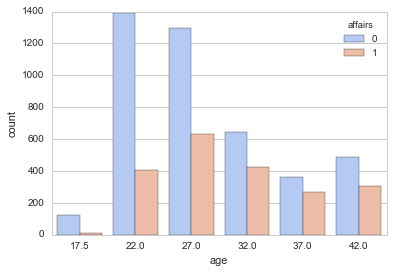

In [27]:
sns.countplot('age',data=df,hue='affairs',palette='coolwarm')

The occupation and occupation_husb are categorical and hence should not be considered as continuous data.
Therefore we elimate it my using dummies.

In [28]:
occ_dummies = pd.get_dummies(df['occupation'])

In [29]:
hocc_dummies = pd.get_dummies(df['occupation_husb'])

In [30]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
occ_dummies.columns = ['occ%d' %i for i in range(1,7)]
hocc_dummies.columns = ['hocc%d' %i for i in range(1,7)]

In [32]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
df = pd.concat([df,occ_dummies,hocc_dummies],axis=1)
df.drop(['occupation','occupation_husb'],axis=1,inplace=True)

In [34]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Since we are having highly correlated features as in occ# and hocc# because if any one of those is true the remaing corresponding occ# or hocc# are false. $\\$ So this makes high correlation. In order to eliminate this effect we need to drop atleast one of those related features.

In [35]:
df.drop(['occ1','hocc1'],axis=1,inplace=True)

In [36]:
Y = df[['affairs']]
X = df.drop('affairs',axis=1)

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [38]:
model = LogisticRegression()
model.fit(X_train,Y_train['affairs'].ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
model.score(X_test,Y_test)

0.71670854271356788

In [40]:
DataFrame(model.coef_).T

,0
0,-0.735689
1,-0.054139
2,0.103686
3,0.019880
4,-0.346698
5,0.007805
6,0.248007
7,0.626586
8,0.300940
9,0.968763


## Polynomial Regression

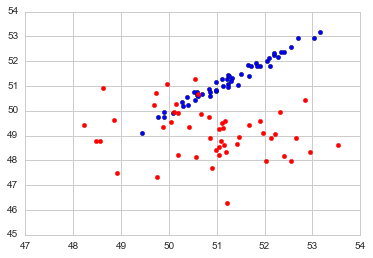

In [41]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=4, n_clusters_per_class=1)
X = X+50

plt.scatter(X[Y==1][:,0],X[Y==1][:,1],label='Malignant')
plt.scatter(X[Y==0][:,0],X[Y==0][:,1],color='red',label='Benign')

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
pf = PolynomialFeatures(degree=2)
pf.fit(X)
XX = pf.transform(X)

In [44]:
model = LogisticRegression()
model.fit(XX,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
model.coef_

array([[-0.03712885, -0.93741442, -0.94394337, -0.88356711,  1.80113688,
        -0.87986097]])

$$\theta_0(x_0)+\theta_1(x_1)+\theta_2(x_2)+\theta_{11}(x_1^2)+\theta_{22}(x_2^2)+\theta_{12}(x_1x_2) \geq 0$$

where $x_0=1$ $\\$.
It gives where it's likelihood of occurance is maximum.

In order to plot we need to find $x_2$

In [46]:
XX[0]

array([  1.00000000e+00,   5.05408800e+01,   5.12741867e+01,
         2.55438055e+03,   2.59144252e+03,   2.62904222e+03])

From above it is clear that we don't need to add $x_0$ to the $X$ as it is done by the **PolynomialFeatures** in sklearn.

In [47]:
model.score(XX,Y)

0.90000000000000002